In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\Home\\Desktop\\data\\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#get dummy values for Gender Columns
Gender=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df,Gender],axis=1)

In [5]:
#delete other columns
df.drop(['RowNumber','Surname','Gender','Geography'],axis=1,inplace=True)

In [6]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#scale values of all variable to some scale
#this help in increasing performance  of algorithm

scaler=StandardScaler()

In [9]:
scaler.fit(df.drop(columns=['Exited']))

StandardScaler()

In [10]:
#use scaled values to create new values
scaled_features=scaler.transform(df.drop(columns=['Exited'],axis=1))

In [11]:
scaled_features[0]

array([-0.78321342, -0.32622142,  0.29351742, -1.04175968, -1.22584767,
       -0.91158349,  0.64609167,  0.97024255,  0.02188649, -1.09598752])

In [12]:
df.columns[:-1]

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
#create DF using scaled values
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [14]:
df_feat_updated=df_feat.rename({'Exited':'Male'},axis='columns')

In [15]:
df_feat_updated.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988


In [16]:
#train_test_split
from sklearn.model_selection import train_test_split

In [17]:
#split the dataset
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['Exited'],test_size=.20)

In [29]:
#import algorithm
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#start with random values of K
knn=KNeighborsClassifier(n_neighbors=2)

In [31]:
knn

KNeighborsClassifier(n_neighbors=2)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
pred=knn.predict(x_test)

In [34]:
pd.Series(pred).value_counts()

0    1827
1     173
dtype: int64

In [35]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
y_test.value_counts()

0    1584
1     416
Name: Exited, dtype: int64

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<AxesSubplot:>

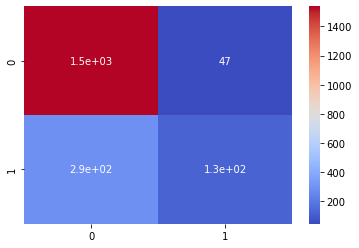

In [38]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

In [39]:
error_rate=[]

#will take some time
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [41]:
print(error_rate)

[0.205, 0.1685, 0.176, 0.1655, 0.168, 0.168, 0.1655, 0.164, 0.165, 0.1635, 0.165, 0.1675, 0.164, 0.1645, 0.1625, 0.1625, 0.161, 0.162, 0.1605, 0.1625, 0.162, 0.164, 0.1615, 0.166, 0.163, 0.1665, 0.166, 0.166, 0.166, 0.1695, 0.1665, 0.168, 0.1665, 0.1715, 0.1695, 0.1715, 0.1675, 0.1685, 0.168]


Text(0, 0.5, 'error rate')

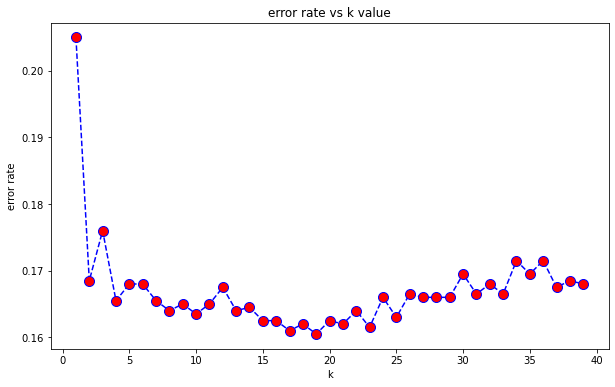

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')


With K=1




              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1584
           1       0.51      0.48      0.50       416

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.79      0.80      0.79      2000



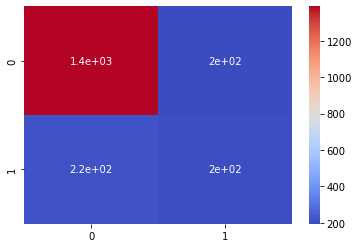

In [43]:
#first a quick comparison to our original k=1

knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print('With K=1')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)

print('\n')
print(classification_report(y_test,pred))

With K=7




              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1584
           1       0.72      0.34      0.46       416

    accuracy                           0.83      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.83      0.81      2000



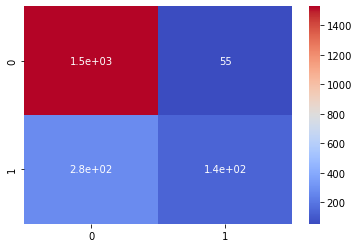

In [44]:
#Now with K=7
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print('With K=7')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)
print('\n')
print(classification_report(y_test,pred))

In [45]:
accuracy_score(y_test,pred)

0.8345

with k=25




              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1584
           1       0.88      0.25      0.39       416

    accuracy                           0.84      2000
   macro avg       0.86      0.62      0.65      2000
weighted avg       0.84      0.84      0.80      2000



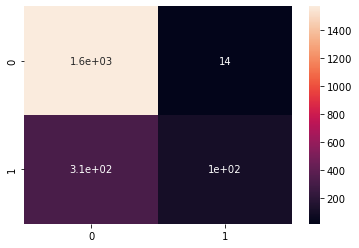

In [48]:
#now with k=25
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)


print('with k=25')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
print('\n')
print(classification_report(y_test,pred))

In [49]:
y_test.value_counts()

0    1584
1     416
Name: Exited, dtype: int64

In [50]:
confusion_matrix(y_pred=pred,y_true=y_test)

array([[1570,   14],
       [ 312,  104]], dtype=int64)

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
os=RandomOverSampler()

In [54]:
x_train,y_train=os.fit_resample(x_train,y_train)

In [55]:
y_train.value_counts()

0    6379
1    6379
Name: Exited, dtype: int64

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [58]:
pred_1=knn.predict(x_test)

In [59]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1584
           1       0.43      0.72      0.54       416

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.75      0.77      2000



with k=25




              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1584
           1       0.43      0.72      0.54       416

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.75      0.77      2000



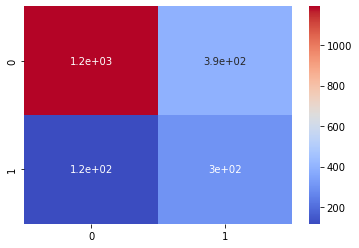

In [62]:
knn=KNeighborsClassifier(n_neighbors=25)

knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print('with k=25')
print('\n')

sns.heatmap(confusion_matrix(y_test,pred),cmap='coolwarm',annot=True)
print('\n')
print(classification_report(y_test,pred))

In [63]:
from imblearn.under_sampling import RandomUnderSampler

In [64]:
us=RandomUnderSampler()

In [66]:
X,Y=us.fit_resample(scaled_features,df['Exited'])

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [74]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [75]:
pred2=knn.predict(x_test)

In [76]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       380
           1       0.76      0.67      0.71       435

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.72      0.71      0.71       815



In [78]:
y_train.value_counts()

0    1657
1    1602
Name: Exited, dtype: int64